#Problem Statement

An Education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.



There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating, etc. ) in order to get a higher lead conversion.

X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score h have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

##Initial Setup and Data Loading

In [1]:
# Importing necessary libraries for data manipulation and visualization
#importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Scaling the continuous variables using StandardScaler
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn import metrics

In [3]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import and read the given datset
lead_data=pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## <span style='color: Blue;'>Step 1: Interpreting dataset</span>

- The given data set has 9240 rows and 27 columns

In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#getting null % for better analysis and rounding it off to 2 decimal places
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

## <span style='color: Blue;'>Step 2: Data Cleaning</span>

In [9]:
#Checking for duplicates
sum(lead_data.duplicated(subset='Prospect ID' ))==0

True

In [10]:
sum(lead_data.duplicated(subset='Lead Number'))==0

True

<span style='color: green;'>Inference:</span>
- There are no duplicated leads in the data set

In [11]:
#dropping Lead Number and Prospect ID since they have all unique values

lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

- Handling the 'Select' level that is present in many of the categorical variables
- These are the ones which options are left unselcted by the lead and is equal to null

In [12]:
lead_data= lead_data.replace('Select', np.nan)

In [13]:
lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

### Dropping Columns with Missing Values >=35%

In [15]:
# #Drop all the columns with more than 45% missing values
cols=lead_data.columns
for i in cols:
     if((100*(lead_data[i].isnull().sum()/len(lead_data.index))) >= 35):
        lead_data.drop(i, 1, inplace = True)

In [16]:
lead_data.shape

(9240, 25)

- After dropping 12 columns

In [17]:
# Rechecking  the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement                             0.0
Through Recommendations     

## <span style='color: Blue;'>Step 3: Categorical Variable Analysis</span>

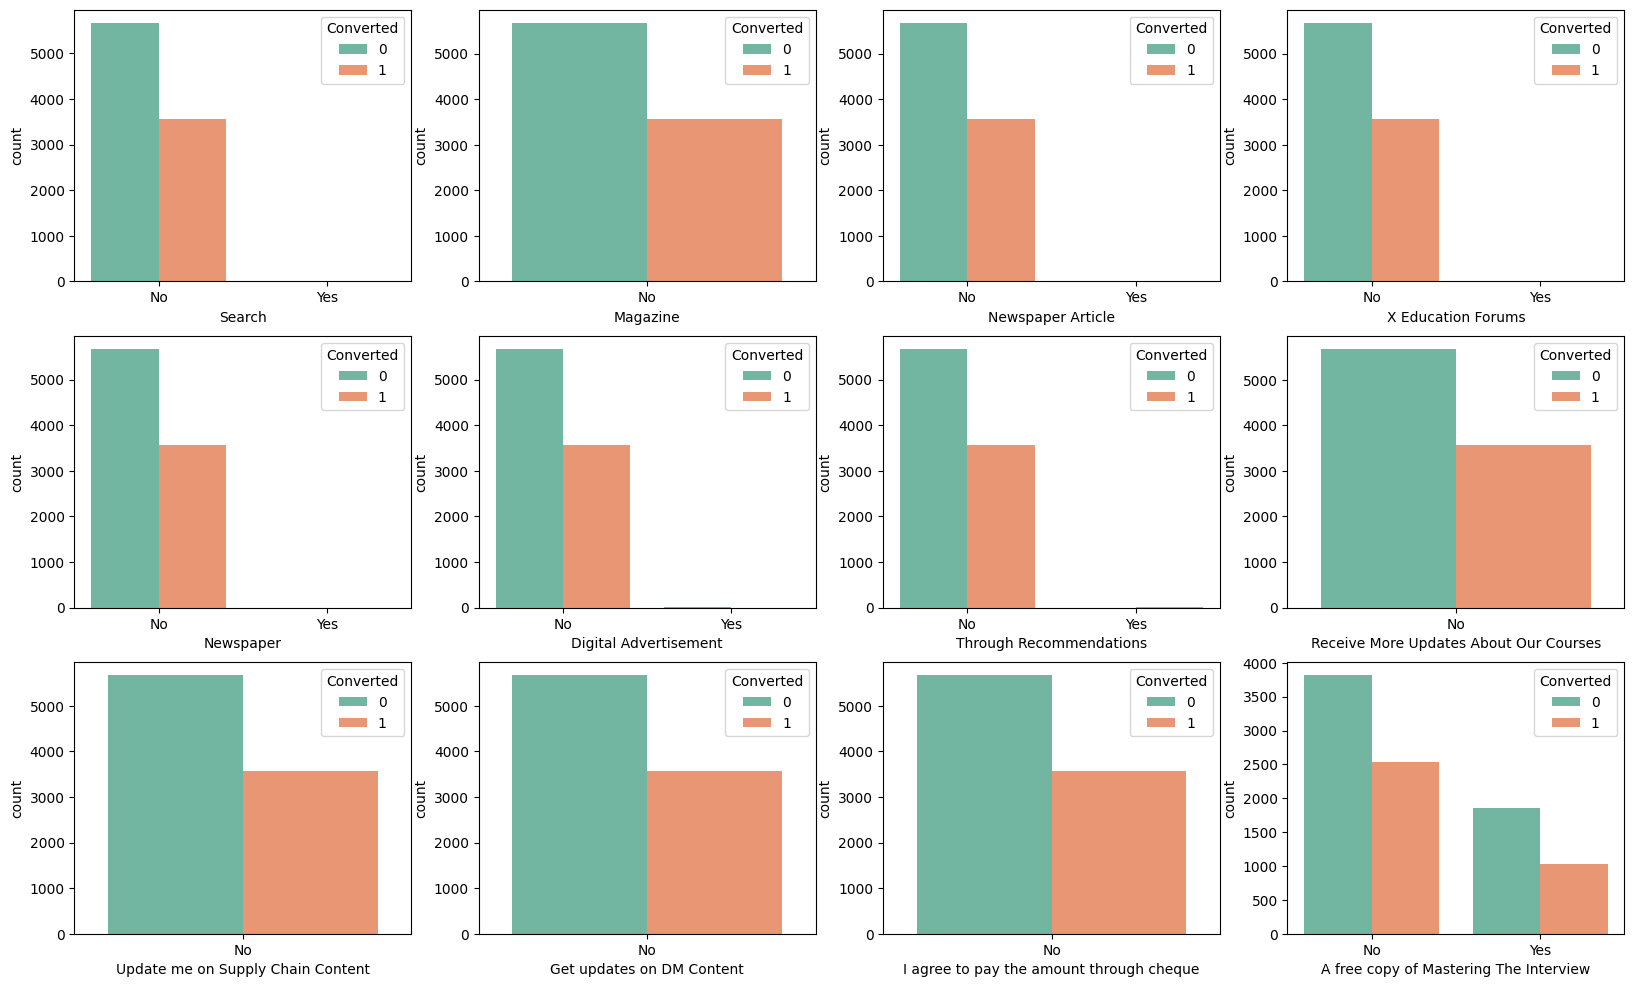

In [18]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = lead_data, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =lead_data, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data, ax = axs[2,3],palette = 'Set2')
plt.show()

- For all these columns except 'A free copy of Mastering The Interview' data is highly imbalanced, so we will drop them
- "A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.
- Hence, we are dropping all the 12 columns mentioned above

In [19]:
#creating a list of columns to be dropped
cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [20]:
lead_data.shape

(9240, 25)

## <span style='color: brown;'>Lead Source</span>

In [21]:
#Checking value counts of lead source column
lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- Google is having highest number of count so replacing null with Google

In [22]:
#replacing Nan Value with Google
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')


In [23]:
#combining low frequency values to Others

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing','Click2call','Press_Release', 'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM','Live Chat'] ,'Others')

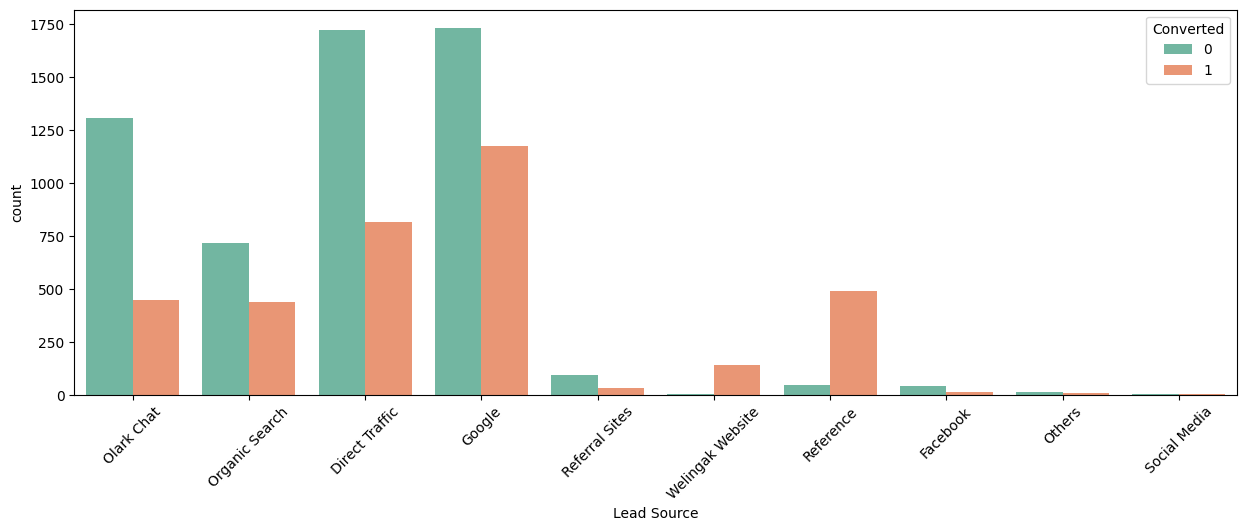

In [24]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =lead_data , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

- Maximum Leads are generated by Google and Direct Traffic.
- Conversion rate of Reference leads and Welinkgak Website leads is very high.

## <span style='color: brown;'>What is your current occupation</span>

In [25]:
lead_data['What is your current occupation'].value_counts(dropna=False) #writing dropna=False to count null values also

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

<span style='color: green;'>Inference:</span>
- There are a lot of null values , so replacing it with a new varibale ' Not Provided' as no information has been given about this

In [26]:
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.NaN, 'Not Provided')

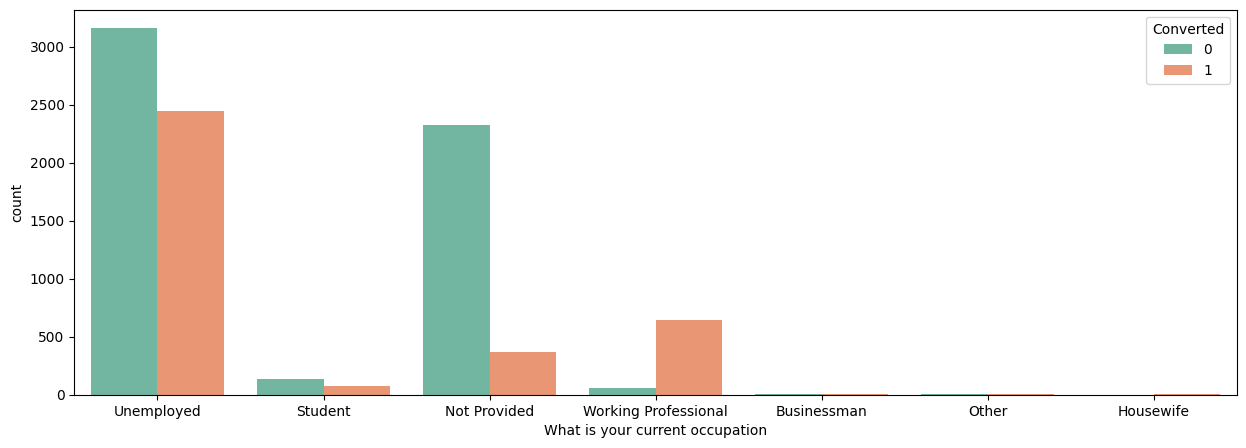

In [27]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(x='What is your current occupation', hue='Converted' , data = lead_data , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

<span style='color: green;'>Inference:</span>
- Maximum number of leads are generated for unemployed and conversion is also good
- Working Professionals shows highest conversion

In [28]:
lead_data.shape

(9240, 25)

## <span style='color: brown;'>Country</span>

In [29]:
lead_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

- Replacing all the null values with 'Not Provided'

In [30]:
lead_data['Country']=lead_data['Country'].replace(np.NaN, 'Not Provided')

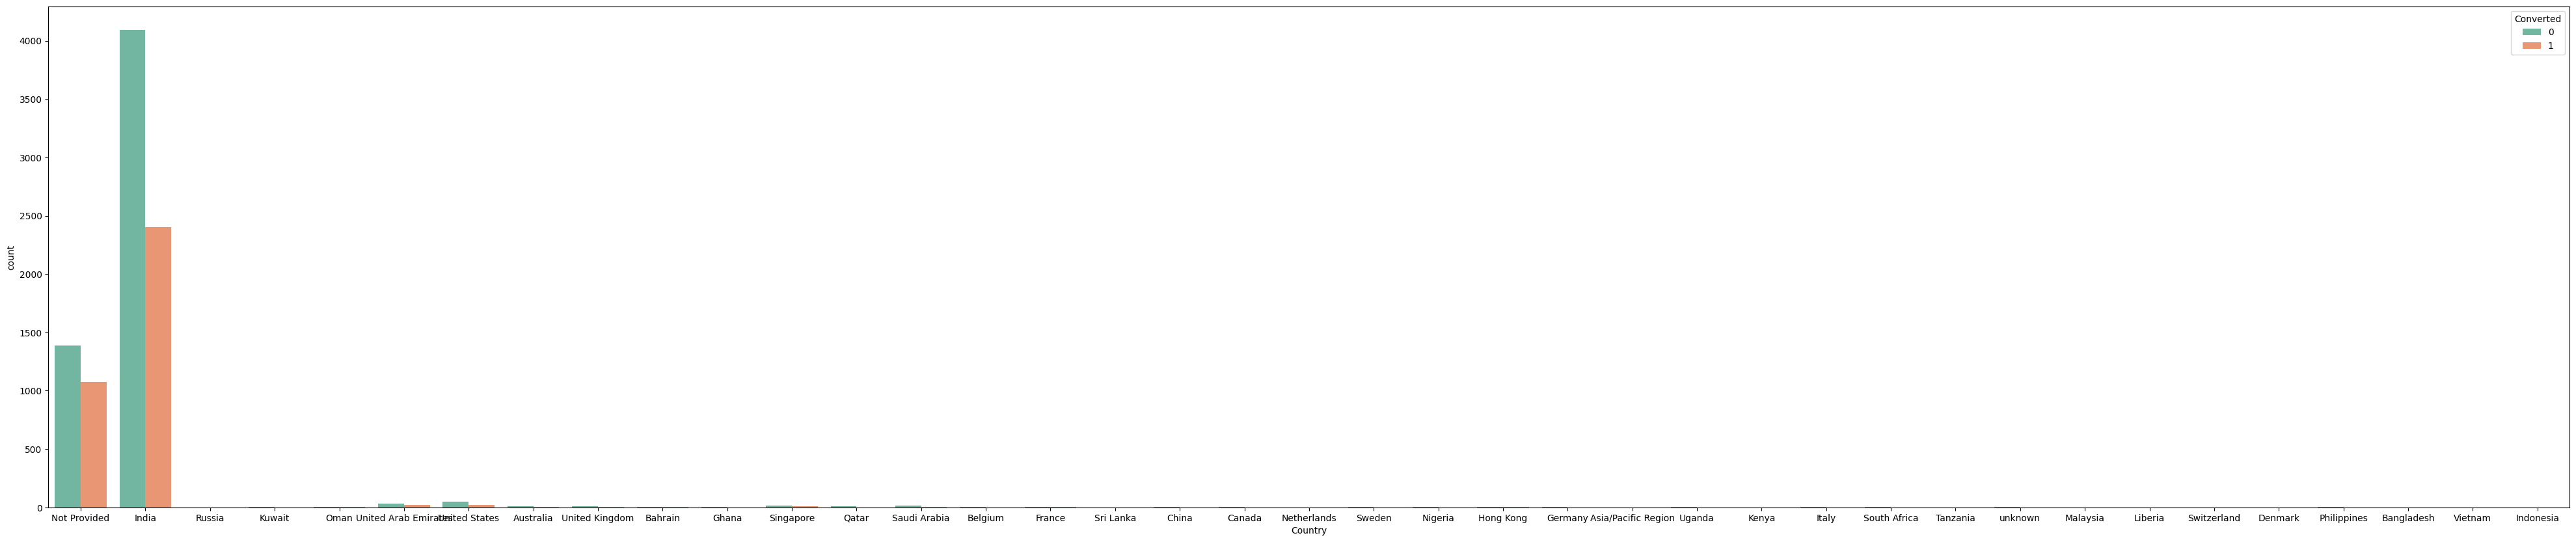

In [31]:
#visualizing country based on Converted value
plt.figure(figsize=(50,10))
sns.countplot(x='Country', hue='Converted' , data = lead_data , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

- Most of the data is only from 1 country that is India so we can drop this column

In [32]:
#creating a list of columns to be droppped
cols_to_drop.append('Country')

#checking the list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [33]:
lead_data.shape

(9240, 25)

## <span style='color: brown;'>What matters most to you in choosing a course</span>

In [34]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

<span style='color: green;'>Inference:</span>
- There atre a lot of null values
- It can be seen that only 1 variable ' Better Career Prospects' has data
- So, dropping this column

In [35]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

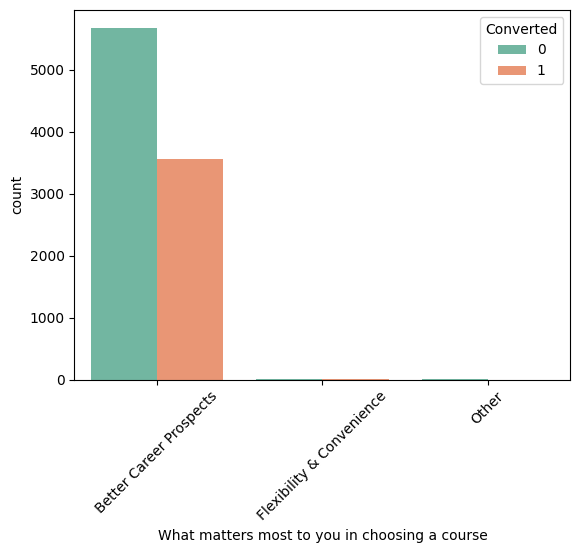

In [36]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = lead_data , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [37]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [38]:
lead_data.shape

(9240, 25)

## <span style='color: brown;'>Last Activity</span>

In [39]:
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

<span style='color: green;'>Inference:</span>
- Replacing null (NaN) values with mode (Email Opened)
- And replacing low frequenc y values with Others

In [40]:
lead_data['Last Activity']=lead_data['Last Activity'].replace(np.NaN, 'Email Opened')

In [41]:
lead_data['Last Activity']=lead_data['Last Activity'].replace(['Approached upfront', 'View in browser link Clicked','Email Received',
                                                               'Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'], 'Others')

In [42]:
lead_data['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

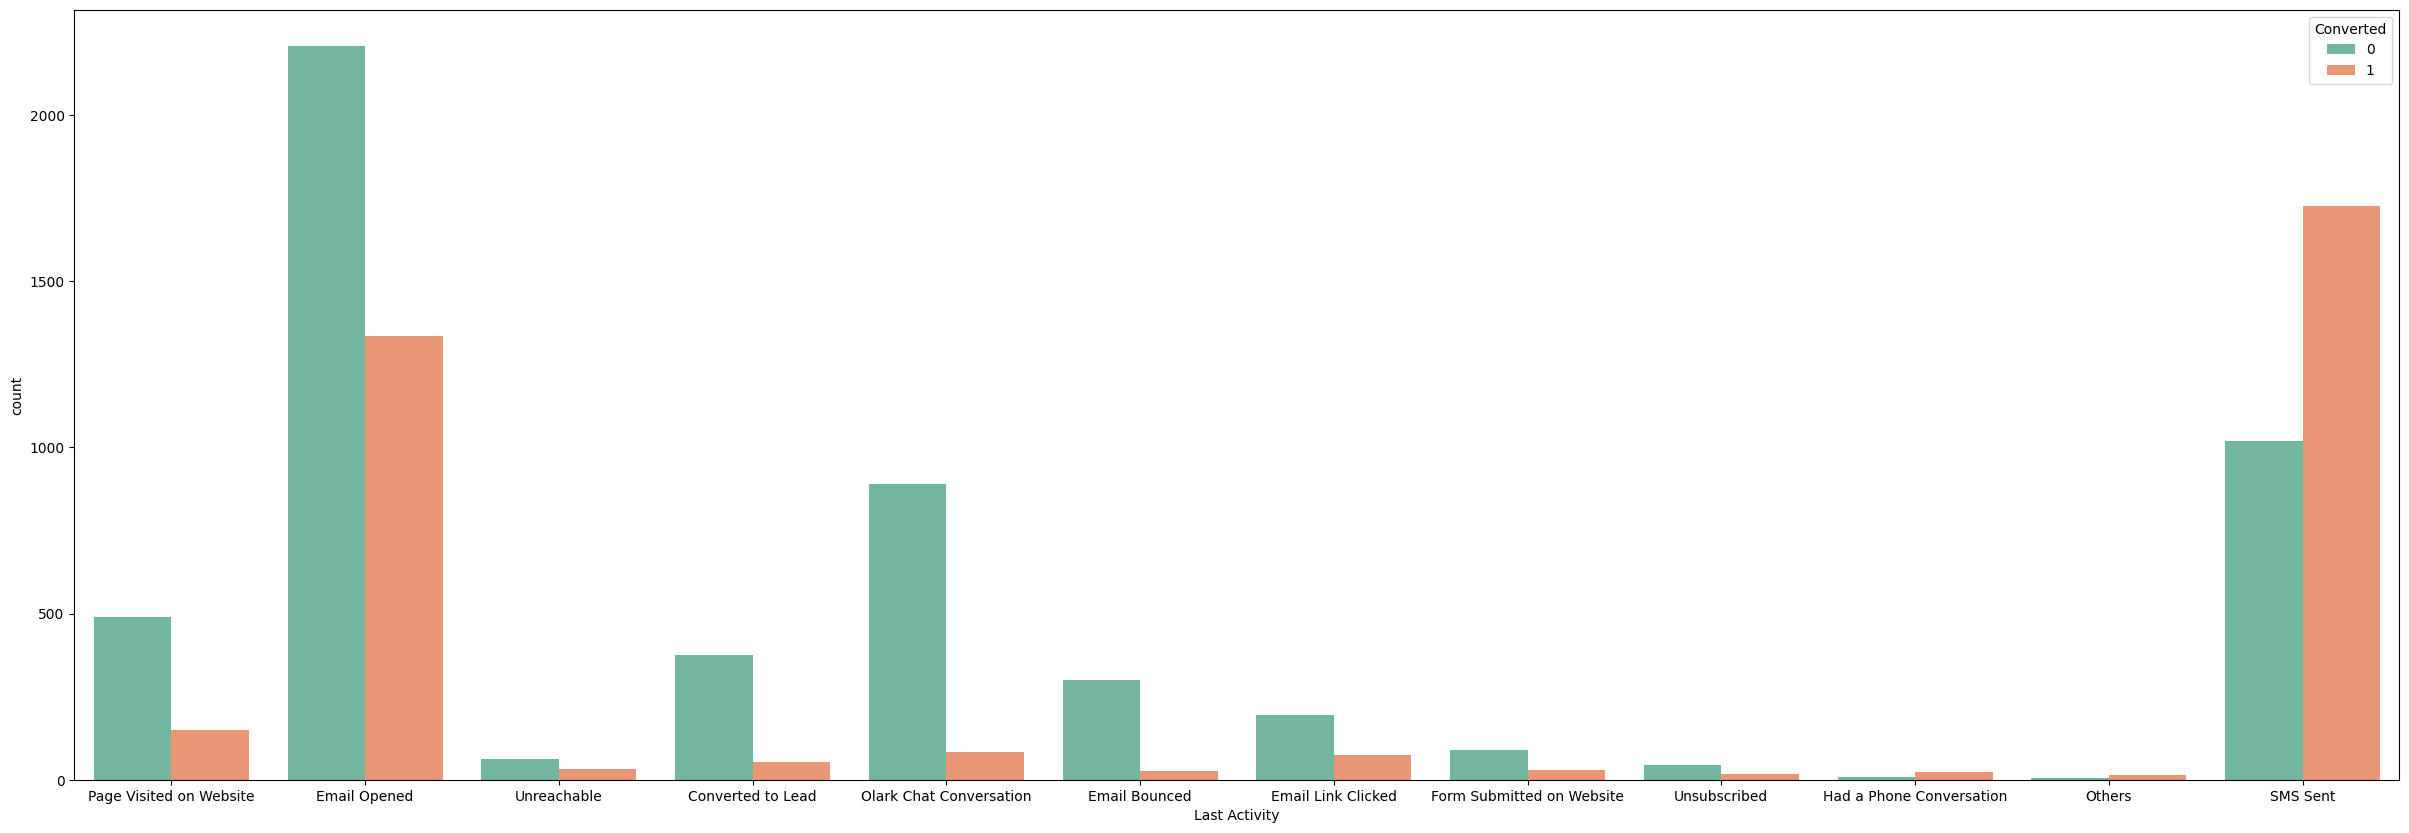

In [43]:
plt.figure(figsize=(30,10))
sns.countplot(x='Last Activity', hue='Converted', data=lead_data, palette='Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<span style='color: green;'>Inference:</span>
- Maximum lead is generated having Email Opened as Last Activity but the conversion rate is less
- Last activity with label SMS sent has the highest conversion
- Conversion rates for 'Had a phone conversation' is also good, but leads generated are less

In [44]:
# Append 'Last Activity' to the cols_to_drop List as it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [45]:
lead_data.shape

(9240, 25)

In [46]:
lead_data.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Country                                            0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                       

In [47]:
#Check the Null Values in All Columns after imputation:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [48]:
lead_data.shape

(9240, 25)

In [49]:
#Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
lead_data = lead_data.dropna()

In [50]:
lead_data.shape

(9103, 25)

### <span style='color: brown;'>Lead Origin</span>

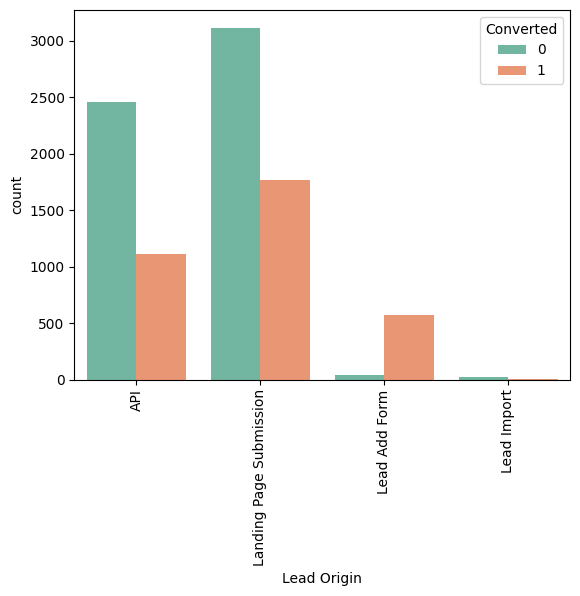

In [51]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = lead_data , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<span style='color: brown;'>Inference</span>
- Maximum leads are generated from landing page submission and API
- Conversion for lead ad form is the best


### <span style='color: brown;'>Do Not Email & Do Not Call</span>

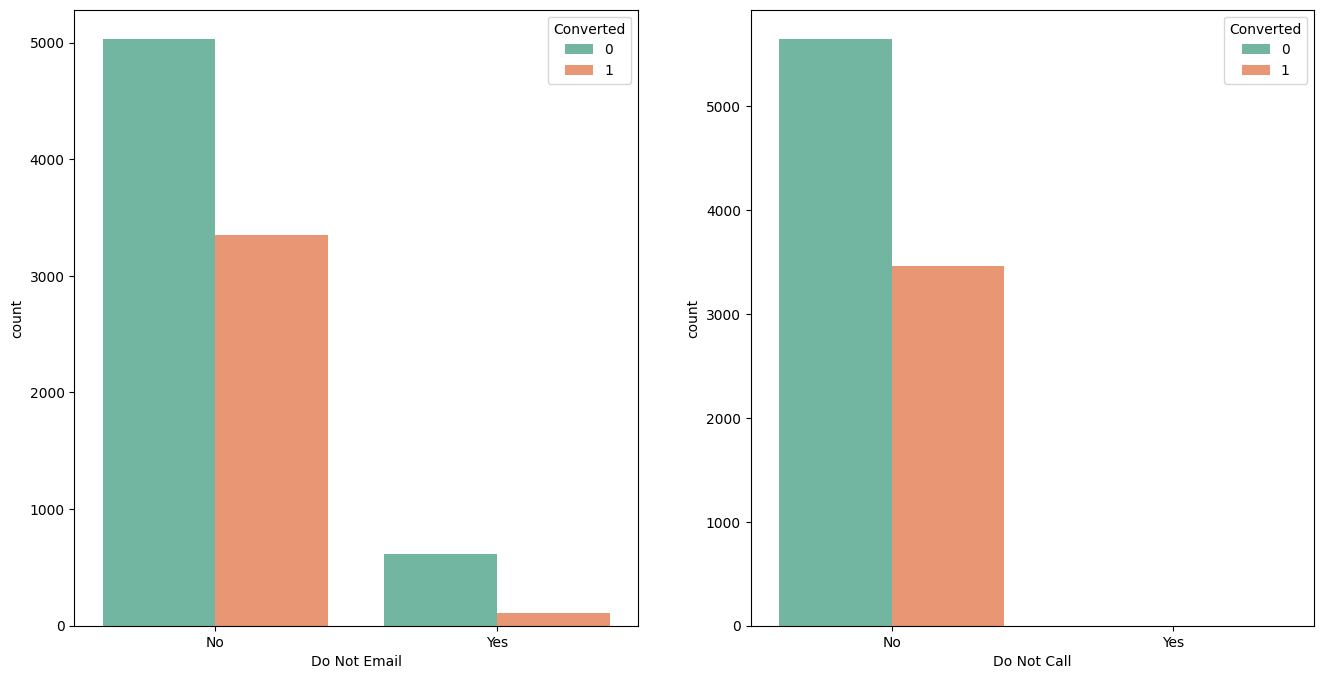

In [52]:
fig, axs = plt.subplots(1,2,figsize = (16,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data, ax = axs[1],palette = 'Set2')
plt.show()

<span style='color: green;'>Inference:</span>
- Data is highly skewed so we can drop this column

In [53]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

## <span style='color: brown;'>Last Notable Activity</span>

In [54]:
lead_data['Last Notable Activity'].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

<span style='color: green;'>Inference:</span>
- No null values found
- Merging all low frequency values into a new column 'Others'

In [55]:
lead_data['Last Notable Activity']=lead_data['Last Notable Activity'].replace(['Email Marked Spam', 'Approached upfront',
                                                                               'Resubscribed to emails', 'View in browser link Clicked',
                                                                               'Form Submitted on Website','Email Received'], 'Others')

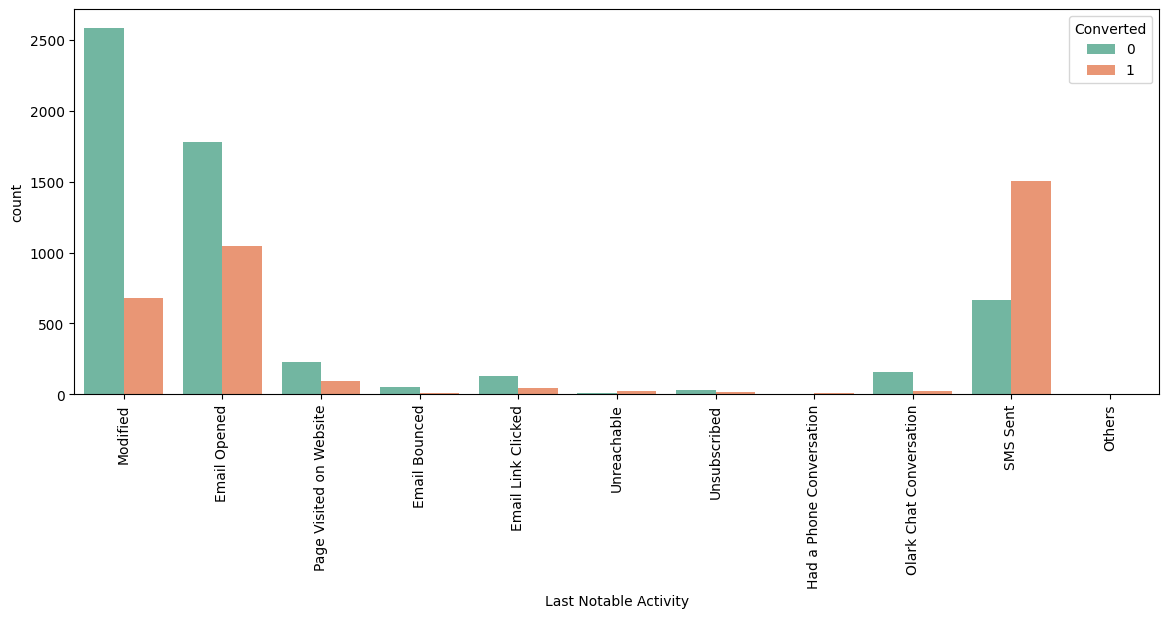

In [56]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

<span style='color: green;'>Inference:</span>
- Maximum lead is generated having 'Modified' and 'Email Opened' as Last Notable Activity but the conversion rate is less
- Last notable activity with label 'SMS sent' has the highest conversion
- Conversion rates for 'Had a phone conversation' is also good, but leads generated are less



In [57]:
# Appending 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [58]:
#dropping columns
leads = lead_data.drop(cols_to_drop,1)

leads.shape

(9103, 8)

In [59]:
#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 640.1+ KB


In [60]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


## <span style='color: Blue;'>Step 4: Numerical Variable Analysis</span>

### <span style='color: brown;'>Converted</span>
- Converted is the target variable
- Indicates whether a lead has been successfully converted (1) or not (0)

In [61]:
leads['Converted'].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [62]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

<span style='color: green;'>Inference:</span>
- Current conversion rate is 38%

### <span style='color: green;'>Heatmap</span>

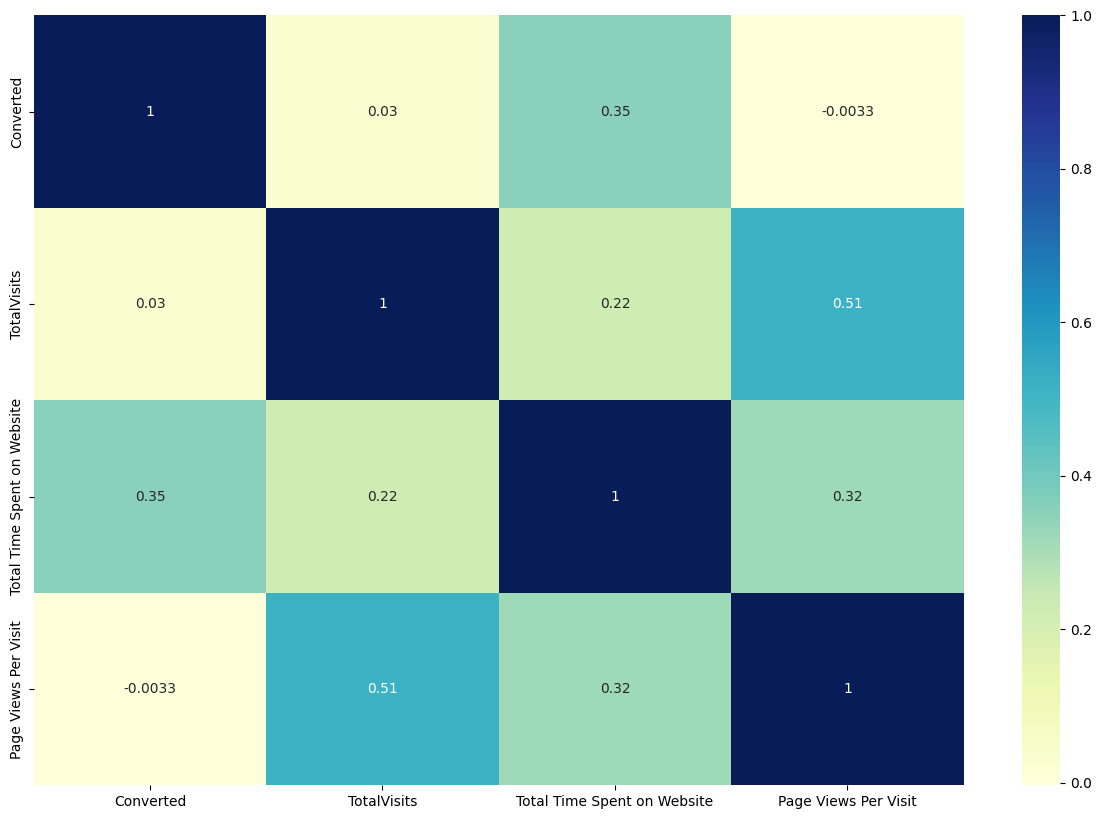

In [63]:
#Checking correlations of numeric values using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

### <span style='color: brown;'>Total Visits</span>

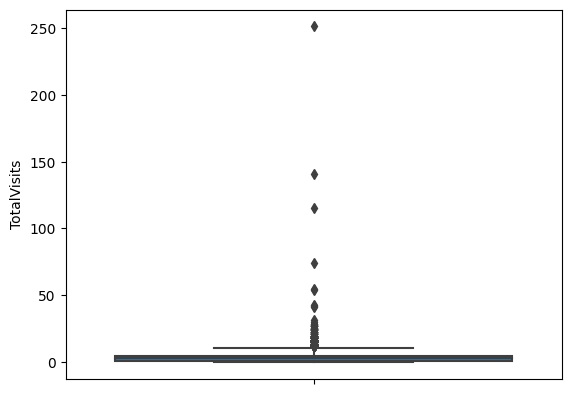

In [64]:
#visualizing spread of variable Total Visits
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [65]:
#there is the presence of outliers
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

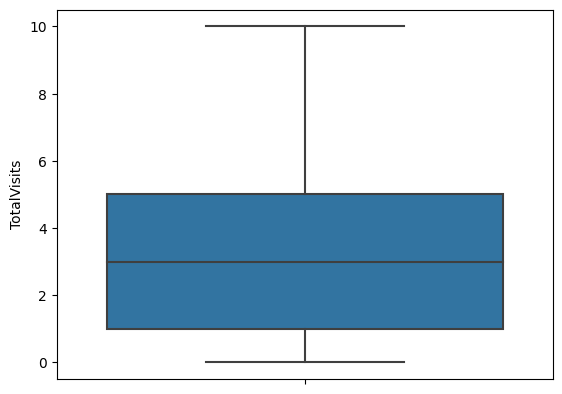

In [66]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

# Visualizing TotalVisits w.r.t Target Variable 'Converted'

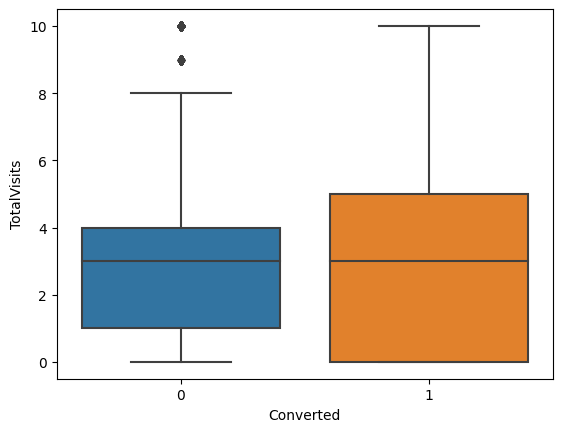

In [67]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

<span style='color: green;'>Inference</span>
- Median for both converted and non converted is the same so no inference can be drawn from Total Visits

## <span style='color: brown;'>Page views per visit</span>

In [68]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

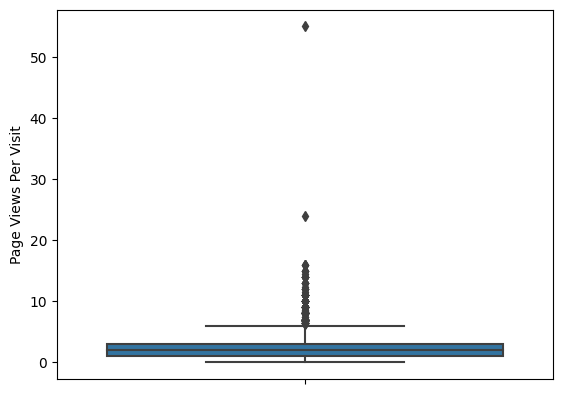

In [69]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

<span style='color: green;'>Inference:</span>
- There is a presence of outlier so outlier treatment is required

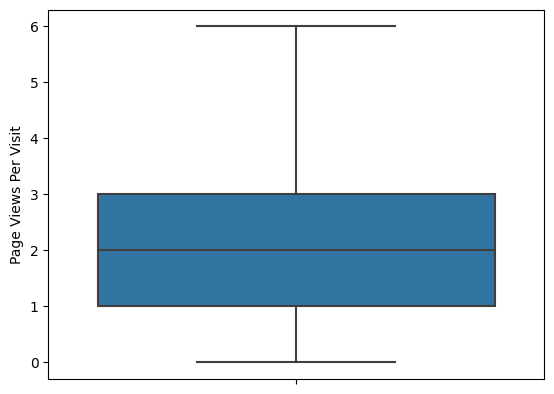

In [70]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

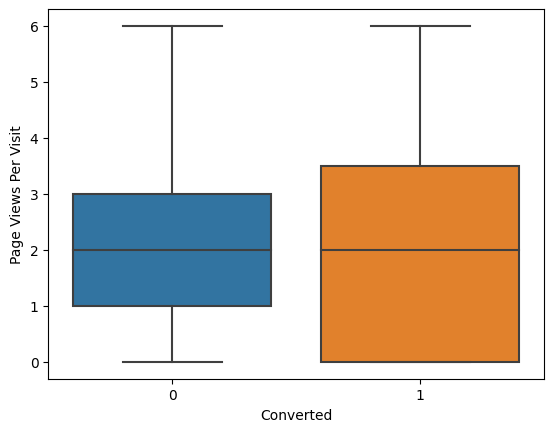

In [71]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

<span style='color: green;'>Inference</span>
- Median for both converted and non converted is the same so no inference can be drawn from 'Page Views Per Visit'

## <span style='color: brown;'>Total time spent on website</span>

In [72]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

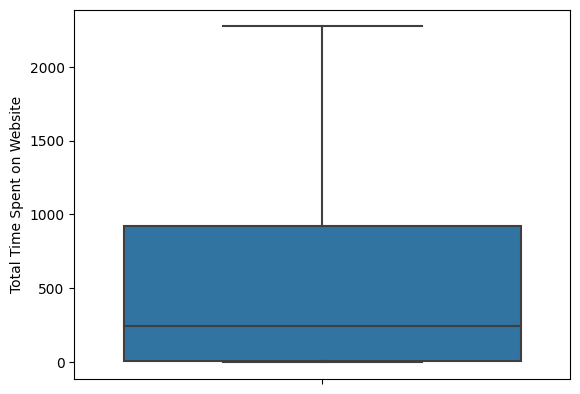

In [73]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

<span style='color: green;'>Inference</span>
- Major outliers not found

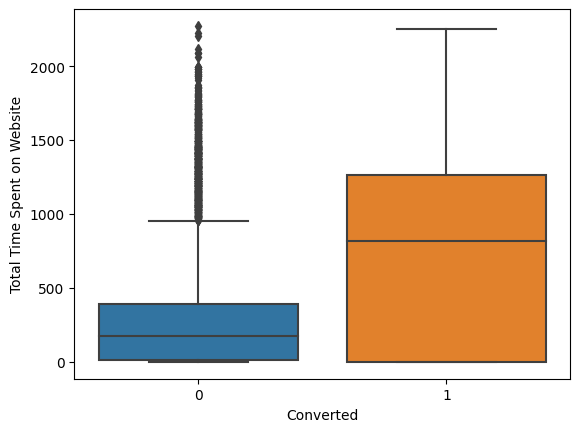

In [74]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

<span style='color: green;'>Inference</span>
- Leads spendinh more time on the website are more likely to convert.
- So, focus should be more on optimizing the website pages

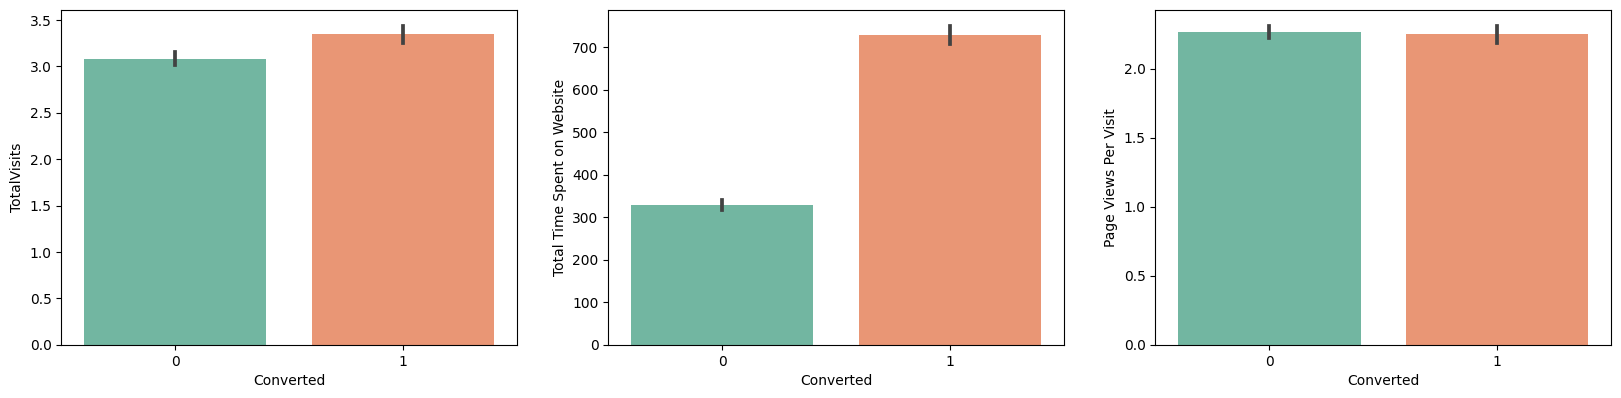

In [75]:
#Plotting numeric varibale w.r.t. target variable 'Converted'
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

<span style='color: green;'>Inference</span>
- Conversion rate is high for 'Total Visits' and 'Page Views Per Visit'

## <span style='color: Blue;'>Step 5: Data Preparation</span>

In [76]:
leads['Do Not Email'].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

## <span style='color: brown;'>Converting some binary variables (Yes/No) to 0/1</span>

In [77]:
# List of variables to map
varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
leads[varlist] = leads[varlist].apply(binary_map)

In [78]:
leads['Do Not Email'].value_counts()

0    8379
1     724
Name: Do Not Email, dtype: int64

In [79]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [80]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 640.1+ KB


## <span style='color: brown;'>Creating Dummy Variables</span>

In [81]:
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [82]:
#getting dummies and dropping the first column and adding results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)


dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not Provided'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [83]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [84]:
#dataset after dummy variable creation
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## <span style='color: Blue;'>Step 6: Train-Test Split</span>

In [85]:
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [86]:
#Putting response variable to y
y=leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

## <span style='color: Blue;'>Step 7: Feature Scaling</span>

In [88]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [89]:
#Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.02043282434362

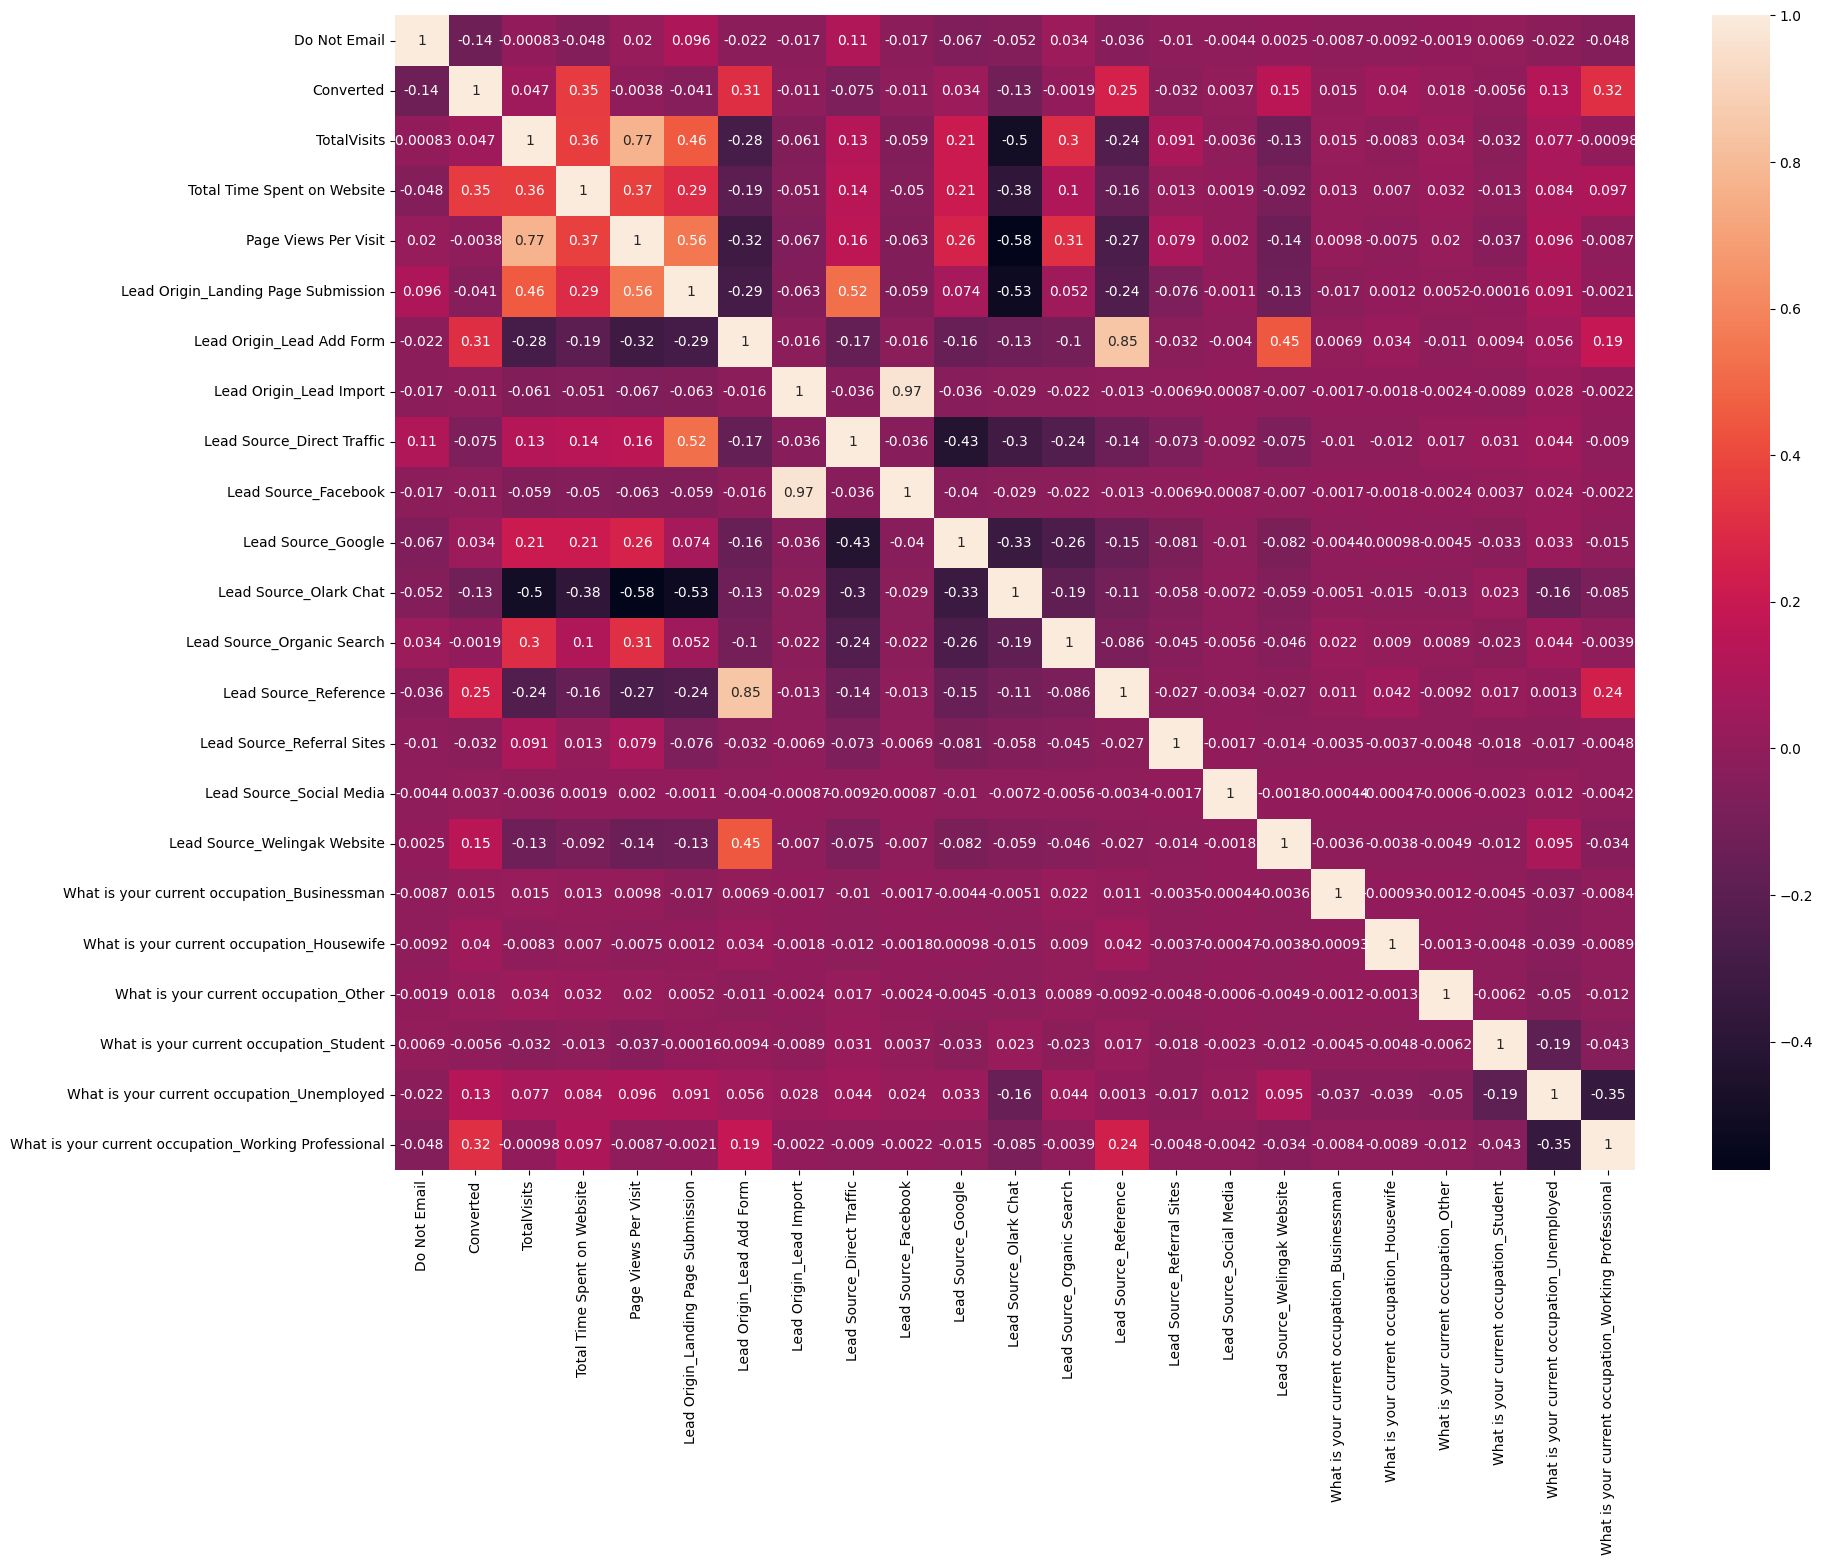

In [90]:
#Correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [91]:
#Dropping hiughly corelated dummy variables
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

## <span style='color: Blue;'>Step 8: Model Building using Stats Model & RFE</span>

In [92]:
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=15)         # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True])

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [95]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [96]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Social Media'],
      dtype='object')

## <span style='color: brown;'>Model 1</span>

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.8
Date:                Tue, 21 Nov 2023   Deviance:                       5725.6
Time:                        11:03:29   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3490
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2420      0.096    -12.979      0.000      -1.430      -1.054
Do Not Email                                            -0.3583      0.043     -8.295      0.000      -0.443      -0.274
Total Time Spent on Website                              1.0998      0.038     28.576      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1642      0.774      5.379      0.000       2.647       5.682
Lead Source_Direct Traffic                              -1.0592      0.108     -9.834      0.000      -1.270      -0.848
Lead Source_Google                                      -0.7850      0.103     -7.616      0.000      -0.987      -0.583
Lead Source_Organic Search                              -0.8803      0.124     -7.094      0.000      -1.123      -0.637
Lead Source_Reference                                   -1.3303      0.806     -1.650      0.099      -2.911       0.250
Lead Source_Referral Sites                              -1.3703      0.336     -4.075      0.000      -2.029      -0.711
Lead Source_Welingak Website                             0.7219      1.055      0.684      0.494      -1.347       2.790
What is your current occupation_Businessman              1.5018      0.999      1.503      0.133      -0.456       3.460
What is your current occupation_Housewife               23.8830    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                    1.3577      0.641      2.118      0.034       0.101       2.614
What is your current occupation_Student                  1.1827      0.225      5.268      0.000       0.743       1.623
What is your current occupation_Unemployed               1.3095      0.083     15.683      0.000       1.146       1.473
What is your current occupation_Working Professional     3.8054      0.189     20.105      0.000       3.434       4.176
========================================================================================================================
"""

<span style='color: green;'>Inference</span>
- P value of 'What is your current occupation_Housewife' is very high, so dropping this

In [98]:
col = col.drop('What is your current occupation_Housewife',1)

## <span style='color: brown;'>Model 2</span>

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.3
Date:                Tue, 21 Nov 2023   Deviance:                       5744.6
Time:                        11:03:29   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2247      0.095    -12.862      0.000      -1.411      -1.038
Do Not Email                                            -0.3597      0.043     -8.331      0.000      -0.444      -0.275
Total Time Spent on Website                              1.0996      0.038     28.619      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1662      0.774      5.381      0.000       2.649       5.684
Lead Source_Direct Traffic                              -1.0517      0.108     -9.778      0.000      -1.262      -0.841
Lead Source_Google                                      -0.7756      0.103     -7.540      0.000      -0.977      -0.574
Lead Source_Organic Search                              -0.8645      0.124     -6.984      0.000      -1.107      -0.622
Lead Source_Reference                                   -1.3089      0.806     -1.623      0.105      -2.889       0.272
Lead Source_Referral Sites                              -1.3681      0.336     -4.072      0.000      -2.027      -0.710
Lead Source_Welingak Website                             0.7294      1.055      0.691      0.490      -1.339       2.798
What is your current occupation_Businessman              1.4744      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3321      0.641      2.079      0.038       0.076       2.588
What is your current occupation_Student                  1.1579      0.224      5.160      0.000       0.718       1.598
What is your current occupation_Unemployed               1.2836      0.083     15.498      0.000       1.121       1.446
What is your current occupation_Working Professional     3.7795      0.189     19.999      0.000       3.409       4.150
========================================================================================================================
"""

<span style='color: green;'>Inference</span>
- P value of 'What is your current occupation_Businessman' is very high, so dropping this

In [100]:
col = col.drop('What is your current occupation_Businessman',1)

## <span style='color: brown;'>Model 3</span>

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.3
Date:                Tue, 21 Nov 2023   Deviance:                       5746.6
Time:                        11:03:29   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3468
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2187      0.095    -12.825      0.000      -1.405      -1.032
Do Not Email                                            -0.3601      0.043     -8.341      0.000      -0.445      -0.275
Total Time Spent on Website                              1.0994      0.038     28.626      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1678      0.774      5.382      0.000       2.650       5.685
Lead Source_Direct Traffic                              -1.0504      0.108     -9.770      0.000      -1.261      -0.840
Lead Source_Google                                      -0.7754      0.103     -7.539      0.000      -0.977      -0.574
Lead Source_Organic Search                              -0.8613      0.124     -6.961      0.000      -1.104      -0.619
Lead Source_Reference                                   -1.2991      0.806     -1.611      0.107      -2.880       0.282
Lead Source_Referral Sites                              -1.3686      0.336     -4.075      0.000      -2.027      -0.710
Lead Source_Welingak Website                             0.7293      1.055      0.691      0.490      -1.339       2.798
What is your current occupation_Other                    1.3250      0.641      2.068      0.039       0.069       2.581
What is your current occupation_Student                  1.1505      0.224      5.129      0.000       0.711       1.590
What is your current occupation_Unemployed               1.2764      0.083     15.462      0.000       1.115       1.438
What is your current occupation_Working Professional     3.7722      0.189     19.973      0.000       3.402       4.142
========================================================================================================================
"""

<span style='color: green;'>Inference</span>
- P value of 'Lead Source_Welingak Website' is very high, so dropping this

In [102]:
col = col.drop('Lead Source_Welingak Website',1)

## <span style='color: brown;'>Model 4</span>

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.5
Date:                Tue, 21 Nov 2023   Deviance:                       5747.1
Time:                        11:03:30   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3468
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2155      0.095    -12.809      0.000      -1.401      -1.030
Do Not Email                                            -0.3610      0.043     -8.360      0.000      -0.446      -0.276
Total Time Spent on Website                              1.1004      0.038     28.661      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6094      0.523      8.810      0.000       3.584       5.635
Lead Source_Direct Traffic                              -1.0547      0.107     -9.823      0.000      -1.265      -0.844
Lead Source_Google                                      -0.7815      0.103     -7.622      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8655      0.124     -7.003      0.000      -1.108      -0.623
Lead Source_Reference                                   -1.7436      0.564     -3.091      0.002      -2.849      -0.638
Lead Source_Referral Sites                              -1.3729      0.336     -4.087      0.000      -2.031      -0.715
What is your current occupation_Other                    1.3254      0.641      2.069      0.039       0.070       2.581
What is your current occupation_Student                  1.1497      0.224      5.122      0.000       0.710       1.590
What is your current occupation_Unemployed               1.2770      0.083     15.469      0.000       1.115       1.439
What is your current occupation_Working Professional     3.7733      0.189     19.975      0.000       3.403       4.143
========================================================================================================================
"""

<span style='color: green;'>Inference</span>
- P value of 'What is your current occupation_Other' is decent but as compared to others it is high so we can remove this.

In [104]:
col = col.drop('What is your current occupation_Other',1)

## <span style='color: brown;'>Model 5</span>

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2875.6
Date:                Tue, 21 Nov 2023   Deviance:                       5751.2
Time:                        11:03:30   Pearson chi2:                 6.43e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3464
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2020      0.094    -12.723      0.000      -1.387      -1.017
Do Not Email                                            -0.3600      0.043     -8.348      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1023      0.038     28.710      0.000       1.027       1.178
Lead Origin_Lead Add Form                                4.6119      0.523      8.816      0.000       3.587       5.637
Lead Source_Direct Traffic                              -1.0496      0.107     -9.783      0.000      -1.260      -0.839
Lead Source_Google                                      -0.7804      0.102     -7.615      0.000      -0.981      -0.580
Lead Source_Organic Search                              -0.8639      0.124     -6.987      0.000      -1.106      -0.622
Lead Source_Reference                                   -1.7425      0.564     -3.089      0.002      -2.848      -0.637
Lead Source_Referral Sites                              -1.3749      0.336     -4.094      0.000      -2.033      -0.717
What is your current occupation_Student                  1.1342      0.224      5.057      0.000       0.695       1.574
What is your current occupation_Unemployed               1.2613      0.082     15.384      0.000       1.101       1.422
What is your current occupation_Working Professional     3.7575      0.189     19.919      0.000       3.388       4.127
========================================================================================================================
"""

<span style='color: green;'>Inference</span>
- This models looks good and stable now, P value is also controlled, so we will go ahead with this model

## <span style='color: brown;'>VIF</span>

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,3.81
6,Lead Source_Reference,3.63
9,What is your current occupation_Unemployed,2.58
4,Lead Source_Google,1.70
3,Lead Source_Direct Traffic,1.67
5,Lead Source_Organic Search,1.31
10,What is your current occupation_Working Profes...,1.29
1,Total Time Spent on Website,1.12
8,What is your current occupation_Student,1.05
0,Do Not Email,1.03


<span style='color: green;'>Inference</span>
- The VIF for all variables is between 1 and 5, which is good, so we can go ahead with this model to make predictions

## <span style='color: brown;'>Making predictions of a train model</span>

In [107]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.733427
5520    0.150019
1962    0.223565
1566    0.968245
9170    0.308725
5097    0.112311
8954    0.254701
309     0.258253
5519    0.112311
1050    0.648854
dtype: float64

In [108]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73342692, 0.15001897, 0.22356515, 0.96824499, 0.30872547,
       0.11231116, 0.25470142, 0.25825332, 0.11231116, 0.64885439])

In [109]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.733427,7962
1,0,0.150019,5520
2,0,0.223565,1962
3,1,0.968245,1566
4,0,0.308725,9170


In [110]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the final head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.733427,7962,1
1,0,0.150019,5520,0
2,0,0.223565,1962,0
3,1,0.968245,1566,1
4,0,0.308725,9170,0


## <span style='color: brown;'>Calculating Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value</span>

In [111]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3550  403]
 [ 849 1570]]


In [112]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
#Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


0.8035153797865662


In [114]:
#Sensitivity
TP / float(TP+FN)

0.649028524183547

In [115]:
#Specificity
TN / float(TN+FP)

0.8980521123197571

In [116]:
#False Postive Rate - predicting conversion when customer does not have convert
print("False Postive Rate: ", FP/ float(TN+FP))
#Positive predictive value
print ("Positive predictive value: ", TP / float(TP+FP))
#Negative predictive value
print ("Negative predictive value: ", TN / float(TN+ FN))

False Postive Rate:  0.10194788768024285
Positive predictive value:  0.7957425240750127
Negative predictive value:  0.8070015912707433


## <span style='color: brown;'>ROC Curve</span>

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

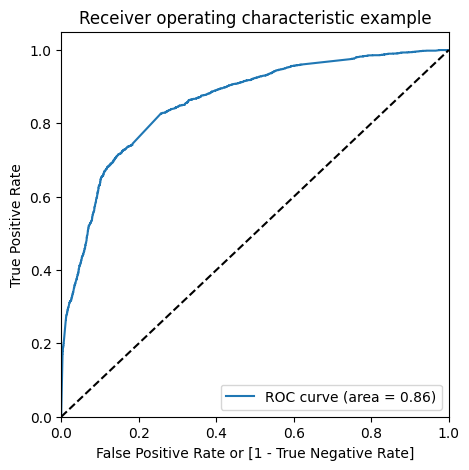

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

<span style= 'color:green;'>Inference:</span>
- The ROC curve has a value of 0.86 which is good(as it is approaching to 1)
- Hence this is a good preddictive model

### <span style='color:brown'>Finding Optimal Cutoff Point</span>

In [119]:
#Checking for a point for balanced sensitivy and specificity
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.733427,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.150019,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.223565,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.968245,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.308725,9170,0,1,1,1,1,0,0,0,0,0,0


In [120]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.515694  0.981811  0.230458
0.2   0.2  0.690521  0.906573  0.558310
0.3   0.3  0.770559  0.828855  0.734885
0.4   0.4  0.801946  0.700703  0.863901
0.5   0.5  0.803515  0.649029  0.898052
0.6   0.6  0.780917  0.560976  0.915507
0.7   0.7  0.759102  0.466308  0.938275
0.8   0.8  0.733992  0.353865  0.966608
0.9   0.9  0.690207  0.192642  0.994688


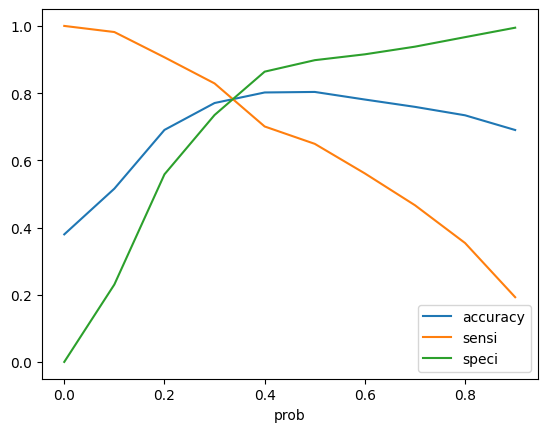

In [121]:
#Pplotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<span style= 'color:green;'>Inference:</span>
- Hence, the optimal cutpoff point comes out to be 0.3

In [122]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.733427,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.150019,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.223565,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.968245,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.308725,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [123]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.733427,7962,1,73
1,0,0.150019,5520,0,15
2,0,0.223565,1962,0,22
3,1,0.968245,1566,1,97
4,0,0.308725,9170,1,31


In [124]:
y_train_pred_final.shape

(6372, 16)

In [125]:
#checking if 80% cases are correctly predicted based on the converted column.
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2005
0     414
Name: final_Predicted, dtype: int64

In [126]:
#checking the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

### Hence, it can be seen that the final prediction of conversions have a target of 82.8% ~ 83% conversion as per the X Educations requirement of CEO . So, we can say that this is a good model.

## <span style='color: brown;'>Calculating Overall Metrics on final prediction on train set</span>

In [127]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2905, 1048],
       [ 414, 2005]])

In [128]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
#Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7705586942875079

In [130]:
#sensitivity
TP / float(TP+FN)

0.8288548987184787

In [131]:
#Specificity
TN / float(TN+FP)

0.7348848975461675

<span style='color:green;'>Inference:</span>
We have following data for the train set-
- Value of ROC Curve: 0.86
- Accuracy : 77.05%
- Sensitivity :82.89%
- Specificity : 73.49%

### <span style='color:brown;'>Predictions on the test set</span>

In [132]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,0.976446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.283540,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [133]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.108519,0,0,0,1,0,0,0,1,0
4050,-0.293797,-0.888077,1,0,0,0,1,0,0,1,0
7201,3.403712,0.420993,0,1,0,0,0,0,0,1,0
1196,-0.293797,-0.110357,0,0,0,1,0,0,0,1,0
8219,-0.293797,-0.433947,0,1,0,0,0,0,0,1,0


In [134]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2731, 12)

In [135]:
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

3504    0.306096
4050    0.886499
7201    0.147829
1196    0.305665
8219    0.203766
dtype: float64

In [136]:
#Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.306096
4050,0.886499
7201,0.147829
1196,0.305665
8219,0.203766


In [137]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [138]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [139]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.306096
1,1,4050,0.886499
2,0,7201,0.147829
3,0,1196,0.305665
4,1,8219,0.203766


In [140]:
#Remaining the columns with name 0 to Converted_prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.306096
1,1,4050,0.886499
2,0,7201,0.147829
3,0,1196,0.305665
4,1,8219,0.203766


### <span style='color:brown;'>Assigning Lead Score</span>

In [141]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.306096,31
1,4050,1,0.886499,89
2,7201,0,0.147829,15
3,1196,0,0.305665,31
4,8219,1,0.203766,20


In [142]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.306096,31,1
1,4050,1,0.886499,89,1
2,7201,0,0.147829,15,0
3,1196,0,0.305665,31,1
4,8219,1,0.203766,20,0


In [143]:
# checking if 80% cases are correctly predicted based on the converted column.
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    865
0    177
Name: final_Predicted, dtype: int64

In [144]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

### Hence , the final prediction of conversions have a target rate of 83% which is same as predictions made on training data set

## <span style='color: brown;'>Calculating Overall Metrics on final prediction on test set</span>

In [145]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1252,  437],
       [ 177,  865]])

In [146]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
#Overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7751739289637496

In [148]:
#Sensitivity
TP / float(TP+FN)

0.8301343570057581

In [149]:
#Specificity
TN / float(TN+FP)

0.7412670219064535

<span style='color:green;'>Inference:</span>
We have following data for the test set-

- Accuracy : 77.52%
- Sensitivity :83.01%
- Specificity : 74.13%

### Results:

### <span style='color:brown;'>Comparing the metrices values obtained for Train & Test:</span>




 | Train Set   |   Test Set

|----------|--------------------|

Accuracy     | 77.05%      |   77.52%     |

Sensitivy    | 82.89%      |   83.01%     |

Specificity  | 73.49%      |   74.13%     |

### <span style='color:brown;'>Leads which should be contacted</span>

In [150]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
1,4050,1,0.886499,89,1
9,8187,0,0.886499,89,1
15,4726,0,0.866144,87,1
23,7005,1,0.989561,99,1
57,789,1,0.961897,96,1
...,...,...,...,...,...
2717,6163,1,0.931167,93,1
2718,1467,1,0.937838,94,1
2719,4781,1,0.989561,99,1
2724,8348,1,0.891859,89,1


In [151]:
hot_leads.value_counts().sum()

336

### Hence there are a total of 336 leads which should be contacted and have high chances of getting converted

### <span style='color:brown;'>Prospect ID of customers who should be contacted</span>

In [152]:
print("The Prospect ID of the customers which should be contacted are :")
hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([4050, 8187, 4726, 7005,  789, 4844, 7989, 7725, 8075, 8873, 1897,
       1030, 1525, 4409,  802,  737, 8681, 4548, 1157, 5258, 2852, 8650,
       5373, 4173, 8415, 7320, 7719, 2664, 9228,  785,  446, 3425, 1490,
       8118, 4187, 5815, 5641, 7093, 8867,  337,  211, 9062, 1594, 2489,
         76, 4250, 2460, 3983, 1737, 3407, 6647, 7202, 6314, 2584, 1614,
       8594, 4359, 7877, 1979, 8268, 7121, 5791, 1578, 3248, 5535, 5964,
       5137, 4662, 7883, 4028, 7469, 2681, 5799, 5975,  373, 2121, 2674,
       7089, 6617, 8946, 1722, 8787, 1475, 2841,  505, 1995,  112, 6127,
       2765, 8309, 2860, 8596, 2662, 4149, 6529, 7776, 3566, 1932, 6499,
       6931, 4543, 6438, 7326, 4771, 1481, 4775, 7009, 2475, 2067, 7606,
        999, 2791,  822, 5372, 4297, 2055, 1518, 2598, 2676, 2042, 8104,
       4568, 4732,  941, 8591, 1436, 1542, 8499, 5559, 5206, 3321, 7082,
       4772, 7245, 1454,  174, 8229, 3455, 3466, 4782, 8547, 3268, 4832,
       8490, 4194, 2439, 2114, 5541, 4778, 3267, 13